In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [2]:
import numpy as np # linear algebra
import pandas as pd

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

Using TensorFlow backend.


In [18]:
pip install keras==2.3.1

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [20]:
df = pd.read_csv("train.csv")
df

index                                              title  \
0          0  PRESIDENT TRUMP Explains New “America First” R...   
1          1  TERMINALLY ILL FORMER MISS WI: “Until my last ...   
2          2   Cruz Humiliated By Moderator After Lie About ...   
3          3  Russia revels in Trump victory, looks to sanct...   
4          4  Trump's bid to open U.S. monuments to developm...   
...      ...                                                ...   
39995  39995  U.S. officials step up rhetoric on Russia link...   
39996  39996   McDonald’s Manager To Hispanic Customer: ‘Can...   
39997  39997  SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...   
39998  39998          Robert Parry: Sorting Out the Russia Mess   
39999  39999  Israeli missiles hit military post near Damasc...   

                                                    text       subject  \
0      That s what we re talking about! Another campa...      politics   
1      How is it that Sean Hannity is the only media ...      politics   
2      Almost immediately after learning that longtim...          News   
3      MOSCOW (Reuters) - For all their mutual praise...  politicsNews   
4      WASHINGTON (Reuters) - The Trump administratio...  politicsNews   
...                                                  ...           ...   
39995  (Reuters) - Republican vice presidential candi...  politicsNews   
39996  An employee working at a North Carolina McDona...          News   
39997  Tucker to sanctuary city supporter: how did a ...      politics   
39998  Consortium News Exclusive: The U.S. mainstream...       US_News   
39999  BEIRUT (Reuters) - Israeli missiles struck a m...     worldnews   

                     date class Unnamed: 6  
0             Aug 2, 2017  Fake        NaN  
1             Oct 4, 2016  Fake        NaN  
2       February 13, 2016  Fake        NaN  
3       November 9, 2016   Real        NaN  
4           May 26, 2017   Real        NaN  
...                   ...   ...        ...  
39995   October 16, 2016   Real        NaN  
39996  September 13, 2017  Fake        NaN  
39997        Mar 29, 2017  Fake        NaN  
39998    October 31, 2017  Fake        NaN  
39999   December 2, 2017   Real        NaN  

[40000 rows x 7 columns]

In [21]:
df.drop(columns=['Unnamed: 6'],inplace=True)
df1 = pd.get_dummies(df,drop_first=True,columns=['class'])
df1.drop(columns=['class_February 5, 2017'],inplace=True)
df1.rename(columns={'class_Real':'category'},inplace=True)

In [22]:
df1

index                                              title  \
0          0  PRESIDENT TRUMP Explains New “America First” R...   
1          1  TERMINALLY ILL FORMER MISS WI: “Until my last ...   
2          2   Cruz Humiliated By Moderator After Lie About ...   
3          3  Russia revels in Trump victory, looks to sanct...   
4          4  Trump's bid to open U.S. monuments to developm...   
...      ...                                                ...   
39995  39995  U.S. officials step up rhetoric on Russia link...   
39996  39996   McDonald’s Manager To Hispanic Customer: ‘Can...   
39997  39997  SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...   
39998  39998          Robert Parry: Sorting Out the Russia Mess   
39999  39999  Israeli missiles hit military post near Damasc...   

                                                    text       subject  \
0      That s what we re talking about! Another campa...      politics   
1      How is it that Sean Hannity is the only media ...      politics   
2      Almost immediately after learning that longtim...          News   
3      MOSCOW (Reuters) - For all their mutual praise...  politicsNews   
4      WASHINGTON (Reuters) - The Trump administratio...  politicsNews   
...                                                  ...           ...   
39995  (Reuters) - Republican vice presidential candi...  politicsNews   
39996  An employee working at a North Carolina McDona...          News   
39997  Tucker to sanctuary city supporter: how did a ...      politics   
39998  Consortium News Exclusive: The U.S. mainstream...       US_News   
39999  BEIRUT (Reuters) - Israeli missiles struck a m...     worldnews   

                     date  category  
0             Aug 2, 2017         0  
1             Oct 4, 2016         0  
2       February 13, 2016         0  
3       November 9, 2016          1  
4           May 26, 2017          1  
...                   ...       ...  
39995   October 16, 2016          1  
39996  September 13, 2017         0  
39997        Mar 29, 2017         0  
39998    October 31, 2017         0  
39999   December 2, 2017          1  

[40000 rows x 6 columns]

In [23]:
df1.isna().sum()

index       0
title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [24]:
df.title.count()

40000

In [25]:
df.subject.value_counts()

politicsNews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

[Text(0, 0, 'politics'),
 Text(1, 0, 'News'),
 Text(2, 0, 'politicsNews'),
 Text(3, 0, 'Government News'),
 Text(4, 0, 'worldnews'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'Middle-east'),
 Text(7, 0, 'US_News'),
 Text(8, 0, 'Donald Trump s Muslim ban is proving to be a lot more difficult and a lot less constitutional than his followers hope. While two courts in a row have struck Trump down, even Mitch McConnell is seeing the writing on the wall. He said on Sunday that the Senate will not defend Trump s questionably constitutional Muslim ban.On CNN s State of the Union, McConnell was asked about a couple of Trump s latest, including Trump s defense of Russian President Vladimir Putin s record of assassinating his political enemies, to which Trump essentially shrugged his shoulders and said that the United States does it too. McConnell called Putin  a thug  and then, without a shred of irony in his voice, complained that Putin wasn t legitimately elected.The subject then turned to Trump s

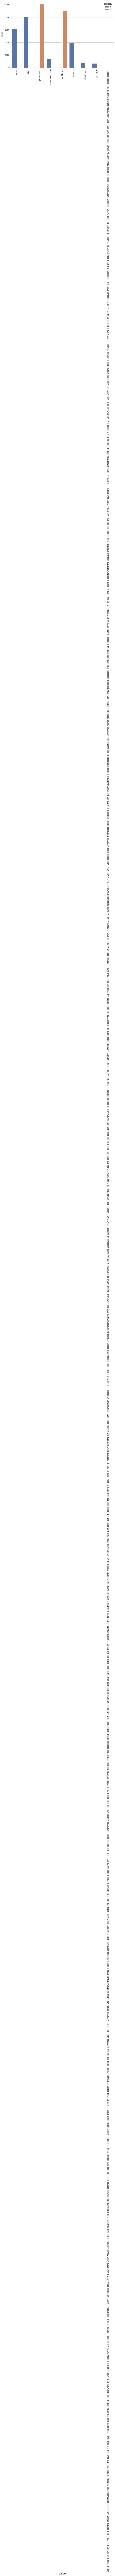

In [26]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [27]:
df1['text'] = df1['text'] + " " + df1['title']
del df1['title']
del df1['subject']
del df1['date']

In [28]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [29]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df1['text']=df1['text'].apply(denoise_text)

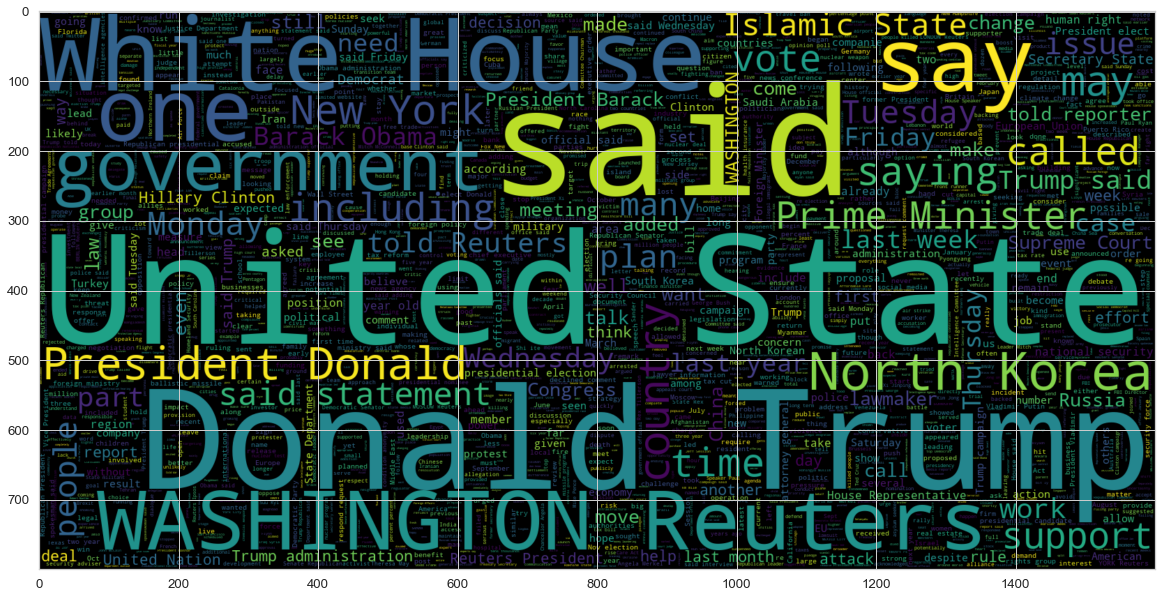

In [30]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df1[df1.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

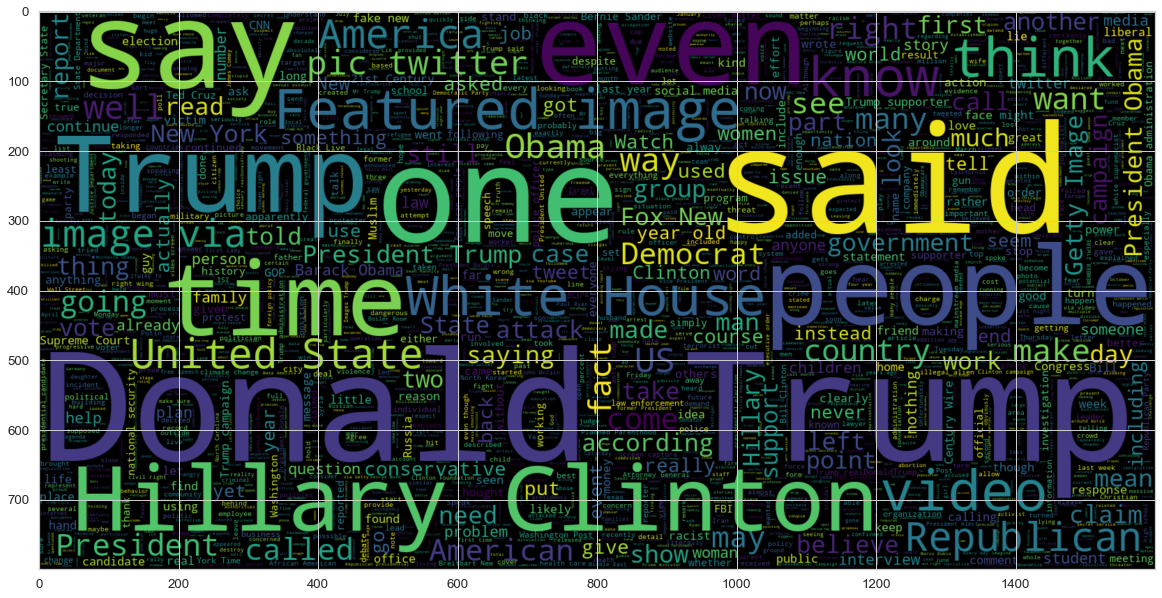

In [31]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df1[df1.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

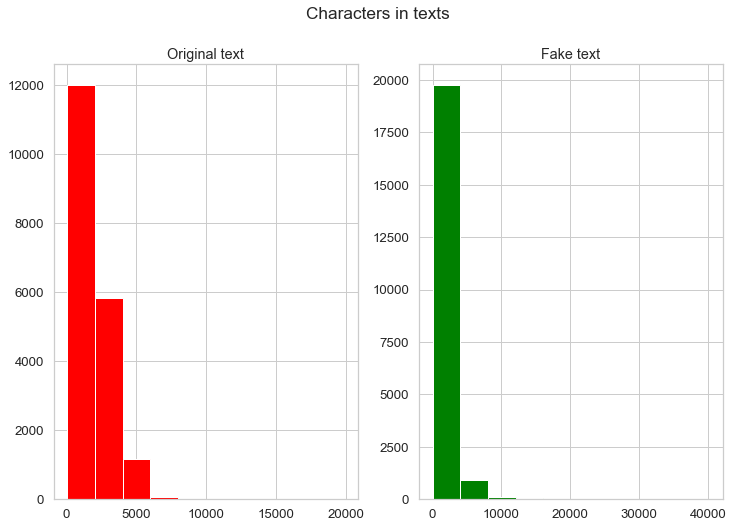

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df1[df1['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df1[df1['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

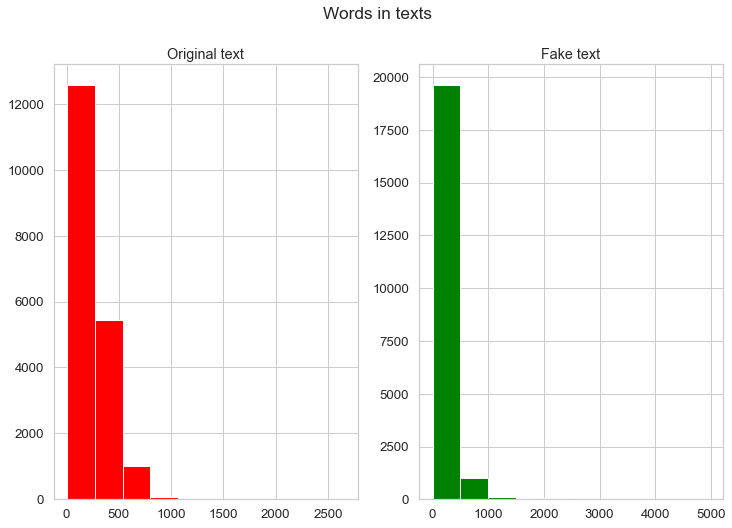

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df1[df1['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df1[df1['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

F:\anaconda\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\envs\gputest\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
F:\anaconda\envs\gputest\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
F:\anaconda\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

Text(0.5, 0.98, 'Average word length in each text')

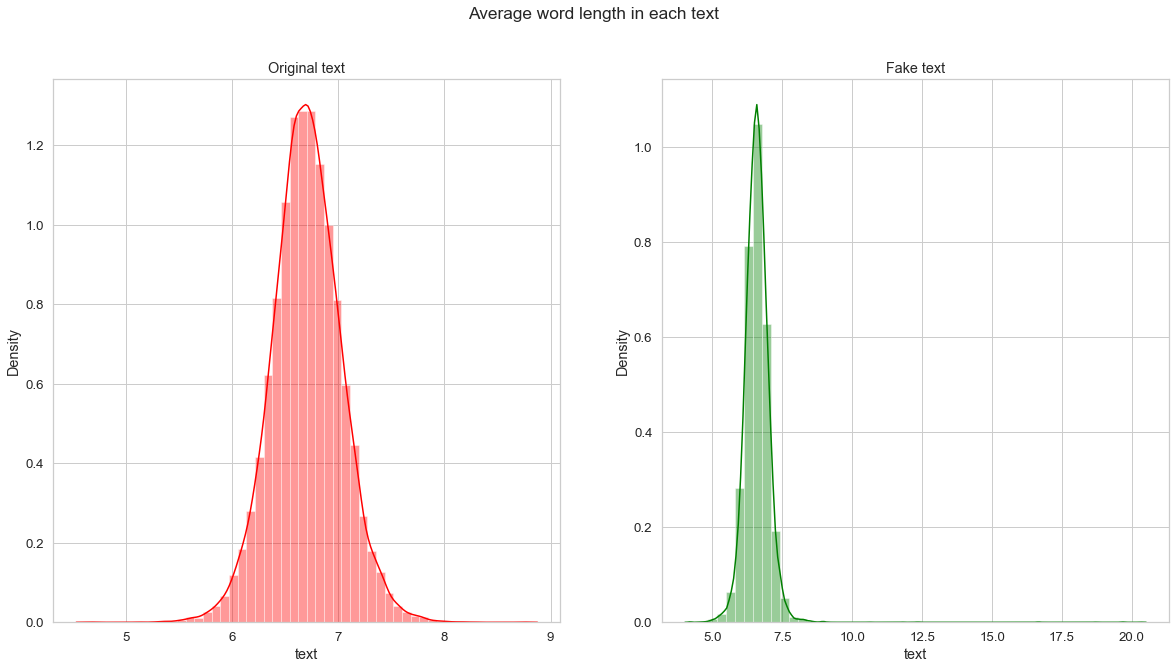

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df1[df1['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df1[df1['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [35]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df1.text)
corpus[:5]

['talking', 'about!', 'Another', 'campaign', 'promise']

In [36]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 99053,
 'said': 82915,
 'would': 48659,
 'U.S.': 44973,
 'President': 29498,
 'people': 29335,
 'also': 26930,
 'one': 26046,
 'Donald': 24825,
 'said.': 23334}

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

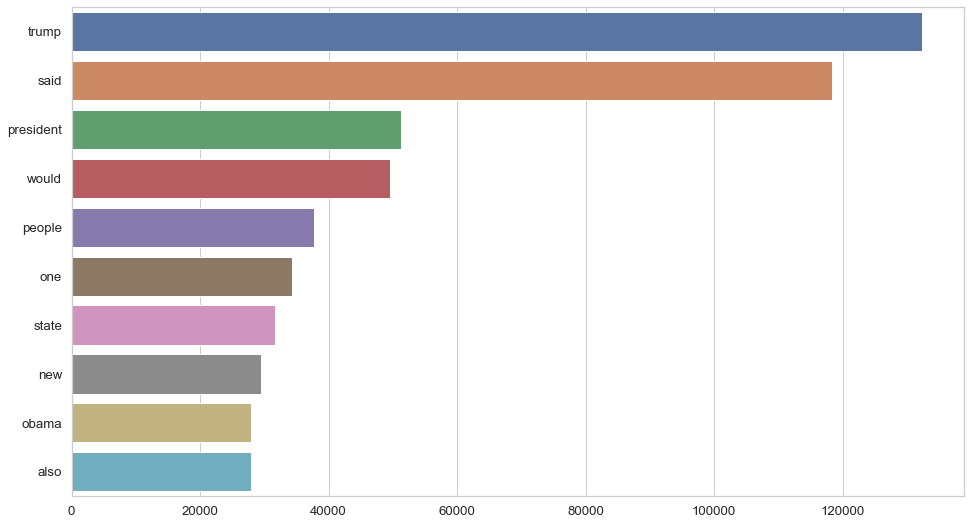

In [38]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df1.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<AxesSubplot:>

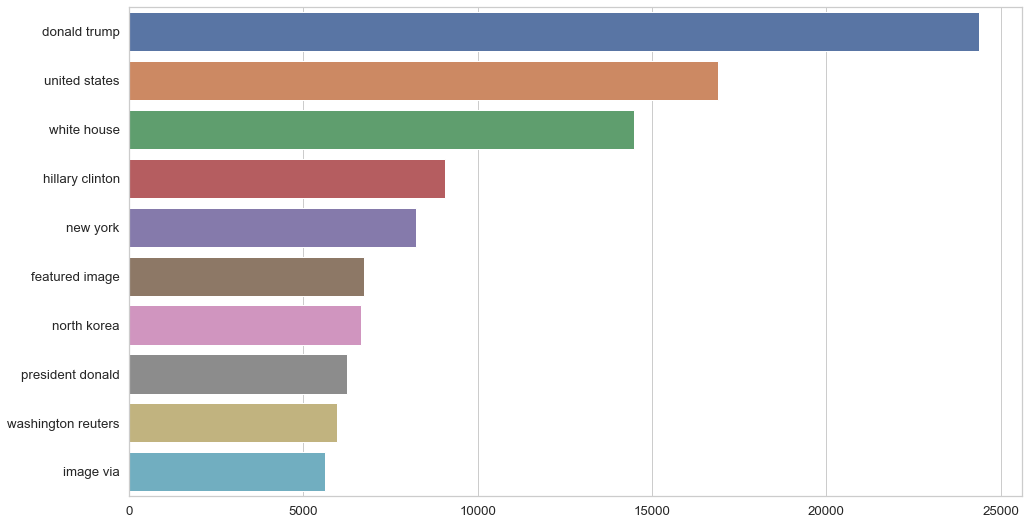

In [39]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df1.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<AxesSubplot:>

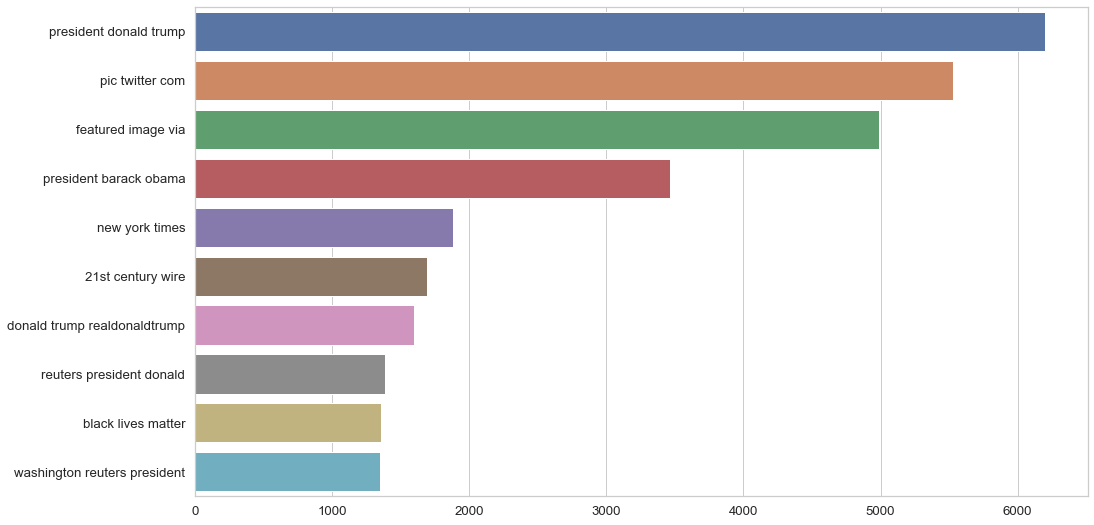

In [40]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df1.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [41]:
x_train,x_test,y_train,y_test = train_test_split(df1.text,df1.category,random_state = 0)

In [42]:
max_features = 10000
maxlen = 300

In [43]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [44]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [45]:
EMBEDDING_FILE = 'glove.twitter.27B/glove.twitter.27B.100d.txt'

In [46]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE,encoding="utf8"))

In [47]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

F:\anaconda\envs\gputest\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [48]:
batch_size = 256
epochs = 10
embed_size = 100

In [49]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [50]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [52]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 57s 2ms/step - loss: 0.1669 - accuracy: 0.9303 - val_loss: 0.0621 - val_accuracy: 0.9757
Epoch 2/10
30000/30000 [==============================] - 54s 2ms/step - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.0141 - val_accuracy: 0.9961
Epoch 3/10
30000/30000 [==============================] - 56s 2ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0172 - val_accuracy: 0.9941
Epoch 4/10
30000/30000 [==============================] - 57s 2ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0154 - val_accuracy: 0.9940

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 5/10
30000/30000 [==============================] - 58s 2ms/step - loss: 0.0147 - accuracy: 0.9945 - val_loss: 0.0049 - val_accuracy: 0.9984
Epoch 6/10
30000/30000 [==============================] - 59s 2ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0066 - val_accur

In [53]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

30000/30000 [==============================] - 68s 2ms/step
Accuracy of the model on Training Data is -  99.95999932289124 %
10000/10000 [==============================] - 23s 2ms/step
Accuracy of the model on Testing Data is -  99.84999895095825 %


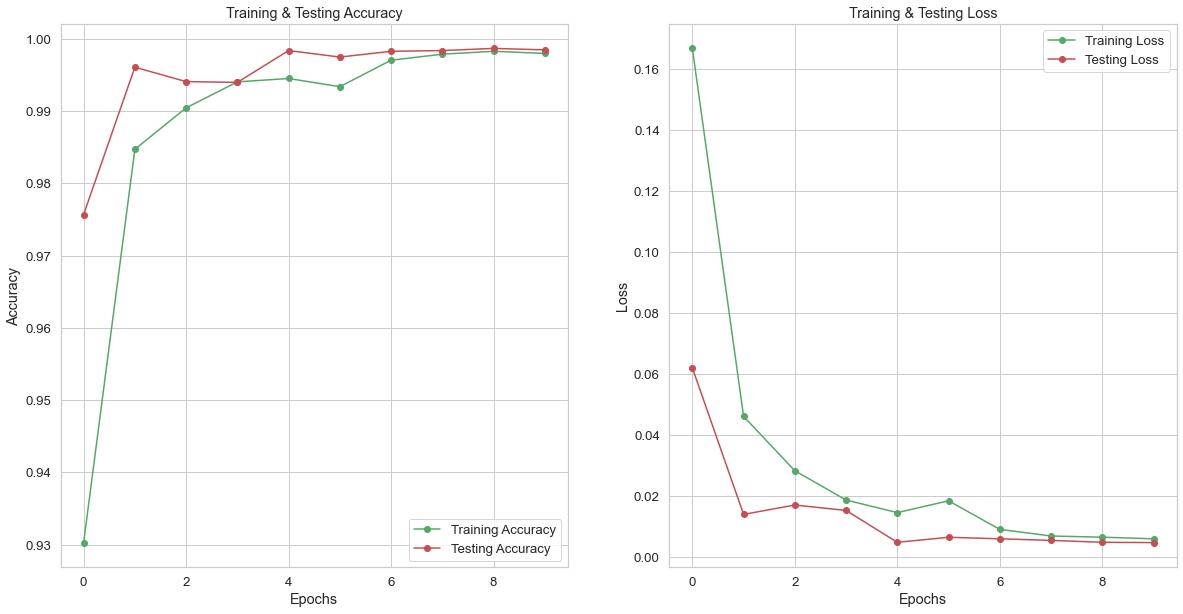

In [54]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [55]:
model.save('model1.h5')

In [56]:
data=pd.read_csv('test.csv')
data

index                                              title  \
0         0  STUNNING TESTIMONY On The Devastation Illegal ...   
1         1  Pena Nieto told Trump Mexico won't pay for wal...   
2         2   Actor George Clooney: I Support Hillary, And ...   
3         3  AWESOME LETTER TO OBAMA: Who is unfit to be pr...   
4         4   This Ridiculously Creepy Vine May Prove Ted C...   
...     ...                                                ...   
3995   3995  WHERE’S THE OVERSIGHT? OBAMA FUNNELED BILLIONS...   
3996   3996  Trump says he is 'very, very close' to making ...   
3997   3997   NSA Chief On Trump’s Russia/US Cybersecurity ...   
3998   3998   Chris Christie Says Only Stupid Judges Will W...   
3999   3999   The Internet EVISCERATES Whiny Nikki Haley Af...   

                                                   text          subject  \
0      Fantastic testimony on the disastrous results...  Government News   
1     MEXICO CITY (Reuters) - Mexican President Enri...     politicsNews   
2     Hillary Clinton has picked up a huge endorseme...             News   
3     Did anyone else think it was the ultimate iron...        left-news   
4     There have been a lot of strange this that hav...             News   
...                                                 ...              ...   
3995   Advocates for big government and progressive ...  Government News   
3996  WASHINGTON (Reuters) - U.S. President Donald T...     politicsNews   
3997  It doesn t take a rocket scientist to know tha...             News   
3998  On New Jersey 101.5, Chris Christie made the a...             News   
3999  The Donald Trump Administration has to be the ...             News   

                   date  
0          Mar 21, 2016  
1      August 31, 2016   
2         March 4, 2016  
3           Aug 5, 2016  
4      February 8, 2016  
...                 ...  
3995        Mar 2, 2017  
3996  October 23, 2017   
3997      July 22, 2017  
3998  December 23, 2016  
3999       July 4, 2017  

[4000 rows x 5 columns]

In [57]:
data.drop(columns=['index','title','subject','date'],inplace=True)
data

text
0      Fantastic testimony on the disastrous results...
1     MEXICO CITY (Reuters) - Mexican President Enri...
2     Hillary Clinton has picked up a huge endorseme...
3     Did anyone else think it was the ultimate iron...
4     There have been a lot of strange this that hav...
...                                                 ...
3995   Advocates for big government and progressive ...
3996  WASHINGTON (Reuters) - U.S. President Donald T...
3997  It doesn t take a rocket scientist to know tha...
3998  On New Jersey 101.5, Chris Christie made the a...
3999  The Donald Trump Administration has to be the ...

[4000 rows x 1 columns]

In [58]:
X_test1 = list(data.text)
X_test1

[' Fantastic testimony on the disastrous results of illegal immigration on the black community: FLASHBACK: Obama wrote in 2006 that Illegal Immigration HURTS  Blue-Collar Americans,  and STRAINS Welfare pic.twitter.com/wpvnqFgIQ9  NumbersUSA (@NumbersUSA) March 20, 2016 ',
 'MEXICO CITY (Reuters) - Mexican President Enrique Pena Nieto on Wednesday told Donald Trump that Mexico would not pay for the Republican presidential candidate’s proposed wall along the Mexico-U.S. border, contradicting Trump’s assertion they didn’t discuss payment. “What the president said is that Mexico, as he has said on several occasions ... will not pay for that wall,” presidential spokesman Eduardo Sanchez told Reuters by telephone. Trump earlier told a joint news conference with Pena Nieto after their meeting in Mexico City that the pair had discussed the wall but not who would pay for it.      ',
 'Hillary Clinton has picked up a huge endorsement, and Donald Trump isn t going to like it one bit.Movie star G

In [59]:
tokenized_test = tokenizer.texts_to_sequences(X_test1)
X_test2 = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [61]:
y_pred1 = (model.predict(X_test2) > 0.5).astype("int")

In [62]:
y_pred1

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [63]:
res = list(y_pred1)

In [64]:
Y_prediction=[]
for i in range(len(res)):
    if res[i]>0.5:
        Y_prediction.append(1)
    else:
        Y_prediction.append(0)
Y_prediction

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [65]:
df3=pd.DataFrame()
df3['index'] = list(i for i in range(4000))
df3['class'] = Y_prediction
df3["class"].replace({0: "Fake", 1: "Real"}, inplace=True)
df3

index class
0         0  Fake
1         1  Real
2         2  Fake
3         3  Fake
4         4  Fake
...     ...   ...
3995   3995  Fake
3996   3996  Real
3997   3997  Fake
3998   3998  Fake
3999   3999  Fake

[4000 rows x 2 columns]

In [66]:
df3.head(20)

index class
0       0  Fake
1       1  Real
2       2  Fake
3       3  Fake
4       4  Fake
5       5  Real
6       6  Fake
7       7  Fake
8       8  Real
9       9  Real
10     10  Real
11     11  Fake
12     12  Real
13     13  Fake
14     14  Fake
15     15  Real
16     16  Real
17     17  Fake
18     18  Fake
19     19  Fake

In [67]:
df3.to_csv("submit1.csv",index=False)